In [1]:
import librosa
import matplotlib.pyplot as plt
from datasets import load_dataset
from random import randint
from transformers import WhisperFeatureExtractor

dataset = load_dataset("speech_commands", "v0.02")

# https://huggingface.co/datasets/speech_commands

Found cached dataset speech_commands (/Users/bingyanghou/.cache/huggingface/datasets/speech_commands/v0.02/0.2.0/ba3d9a6cf49aa1313c51abe16b59203451482ccb9fee6d23c94fecabf3e206da)


  0%|          | 0/3 [00:00<?, ?it/s]

In [2]:
def sample_noise(example):
    # Use this function to extract random 1 sec slices of each _silence_ utterance,
    # e.g. inside `torch.utils.data.Dataset.__getitem__()`
    random_offset = randint(0, len(example['audio']['array']) - example['audio']['sampling_rate'] - 1)
    return example['audio']['array'][random_offset : random_offset + example['audio']['sampling_rate']]

In [3]:
# silence_dataset here is the background noise, default label is 35
silence_dataset = [example for example in dataset['train'] if example['label'] == 35]

In [4]:
def generate_random_noise_samples(num, silence_datasets):
    '''
    num : total number of samples wanted
    silence_datasets : list of silence datasets to pull from
    '''
    noise_samples = []
    
    # Populate `noise_samples` until we reach the desired number of samples 
    while len(noise_samples) < num:
        # Choose
        random_dataset = randint(0,4)
        noise_samples.append(sample_noise(silence_datasets[random_dataset]))
    return noise_samples

In [5]:
def plot_spectrogram(spectrogram):
    '''This function takes in a spectrogram and plots it.'''
    plt.imshow(spectrogram, aspect='auto', origin='lower')
    plt.colorbar()
    plt.xlabel('Time')
    plt.ylabel('Frequency')
    plt.show()

In [6]:
def get_audio_features(file):
    '''This function takes in a file path and a size and returns a spectrogram of the audio file.
    file: path to the audio file (.opus)
    '''
    feature_extractor = WhisperFeatureExtractor(feature_size=40) # initialize feature extractor
    if type(file)==str:
        audio, sr = librosa.load(file) # load audio file
    else:
        audio = file
    features = feature_extractor(audio, sampling_rate=16000, return_tensors="pt") # extract features
    spectrogram = features['input_features'][0] # get spectrogram
    spectrogram = spectrogram[:, :100] # crop spectrogram
    return spectrogram

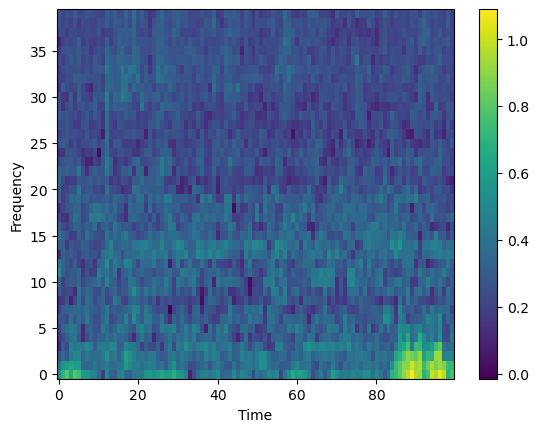

In [8]:
plot_spectrogram(get_audio_features(generate_random_noise_samples(1, silence_dataset)))